In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal

In [2]:
mushroom_data = pd.read_csv('mushroom.csv')

In [3]:
def update_cov(X,mean,weights,group):
    """a function to estimate the covariance with a new mean
    Parameter
    -------------------------------
    X : array-like
    the data with which we want to estimate the new covariance

    mean : array-like
    the new mean that doesn't correspond to the 'true mean'

    weights : arrar-like 
    the matrix of weights of the whole data

    group : int
    the group in which we want to update
    --------------------------------
    """
    sum_of_mat = np.zeros((X.shape[1],X.shape[1]))
    for i in range(X.shape[0]):
        temporal_cov = weights[i,group]*np.matmul((X[i,:]-mean).reshape((X.shape[1],1)),
                                                      (X[i,:]-mean).reshape((1,X.shape[1])))
        sum_of_mat += temporal_cov
    sum_of_weights = np.sum(weights[:,group])
    weighted_sigma = sum_of_mat/sum_of_weights
    return weighted_sigma

In [4]:
mushroom_data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [5]:
n_samples = mushroom_data.shape[0]

In [6]:
mushroom_data['label'] = np.ones((n_samples))*99
for i in range(n_samples):
    random = bernoulli.rvs(p=3/4)
    if mushroom_data.loc[i,'class'] == 1 and random == 0:
        mushroom_data.loc[i,'label'] = 1

In [7]:
mushroom_data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class,label
0,1372,2,2,10,3.807467,1545,11,1.804273,1,99.0
1,1461,2,2,10,3.807467,1557,11,1.804273,1,1.0
2,1371,2,2,10,3.612496,1566,11,1.804273,1,99.0
3,1261,6,2,10,3.787572,1566,11,1.804273,1,99.0
4,1305,6,2,10,3.711971,1464,11,0.943195,1,99.0
...,...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1,1.0
54031,82,2,3,2,1.186164,490,12,0.943195,1,99.0
54032,82,5,3,2,0.915593,584,12,0.888450,1,99.0
54033,79,2,3,2,1.034963,491,12,0.888450,1,99.0


In [8]:
mushroom_data.groupby('label').count()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
label,,,,,,,,,
1.0,7429,7429,7429,7429,7429,7429,7429,7429,7429
99.0,46606,46606,46606,46606,46606,46606,46606,46606,46606


In [9]:
list_of_inertia = []
for i in range(1,7):
    list_of_inertia.append(KMeans(n_clusters=i).fit(X=mushroom_data.drop(['class','label'], axis=1).to_numpy()).inertia_)

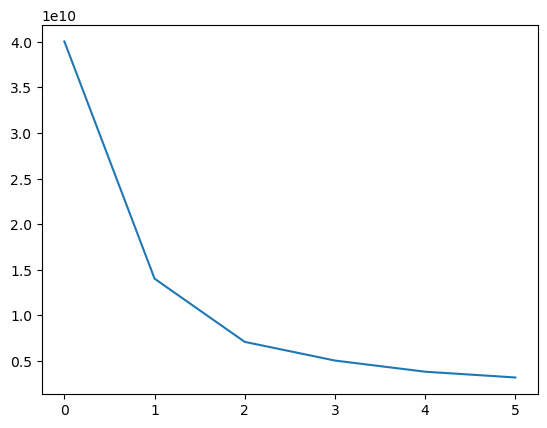

In [10]:
plt.plot(list_of_inertia)

In [11]:
mushroom_data['cluster_lab'] = KMeans(n_clusters=3).fit(X=mushroom_data.drop(['class','label'], axis=1).to_numpy()).labels_

In [12]:
fit_cluster = KMeans(n_clusters=3).fit(X=mushroom_data.drop(['class','label'], axis=1).to_numpy())

In [13]:
mushroom_data[mushroom_data['label']==1].groupby('cluster_lab').count()['label']

cluster_lab
0    2404
1    4216
2     809
Name: label, dtype: int64

In [14]:
positive_cluster = np.where(np.array(mushroom_data[mushroom_data['label']==1].groupby('cluster_lab').count()['label']) == 
                            np.max(np.array(mushroom_data[mushroom_data['label']==1].groupby('cluster_lab').count()['label'])))[0][0]

In [15]:
positive_cluster

1

In [16]:
negative_cluster=np.where(np.array(mushroom_data[mushroom_data['label']==1].groupby('cluster_lab').count()['label']) == 
                            np.min(np.array(mushroom_data[mushroom_data['label']==1].groupby('cluster_lab').count()['label'])))[0][0]

In [17]:
negative_cluster

2

In [18]:
positive_data = mushroom_data[mushroom_data['label'] == 1]
reliable_negative = mushroom_data[mushroom_data['cluster_lab'] == negative_cluster]

In [19]:
positive_data.shape

(7429, 11)

In [20]:
reliable_negative.shape

(7467, 11)

In [21]:
label_1 = positive_data.drop(['class','label','cluster_lab'], axis=1).to_numpy()
label_0 = reliable_negative.drop(['class','label','cluster_lab'], axis=1).to_numpy()

In [22]:
mean_1 = np.mean(label_1,axis=0)
mean_0 = np.mean(label_0, axis=0)

In [23]:
cov_1 = np.cov(label_1, rowvar=False)
cov_0 = np.cov(label_0, rowvar=False)

In [24]:
weights = np.zeros((n_samples,2))

In [25]:
weights

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [26]:
for i in range(n_samples):
    if mushroom_data.loc[i,'cluster_lab'] == negative_cluster:
        mushroom_data.loc[i,'label'] = 0

In [27]:
for group in range(2):
    for i in range(n_samples):
        if mushroom_data.loc[i,'label'] == group:
            weights[i,group] = 1

In [28]:
np.sum(weights,axis=0)

array([7467., 6620.])

In [29]:
pi_0 = 1/2
pi_1 = 1/2

In [30]:
dict_pi = {'pi_0':pi_0,'pi_1':pi_1}

In [31]:
dict_mean = {'mean_0':mean_0,'mean_1':mean_1}
dict_cov = {'cov_0':cov_0,'cov_1':cov_1}

In [32]:
data_gmm = mushroom_data.to_numpy()[:,:8]
iterations = 10
count = 0

#to opti : put the weights to O/1 before so only one condition in the loop

while count<=iterations:
    count+=1
    for group in range(2):
        for i in range(n_samples):
            if mushroom_data.loc[i,'label'] == 99:
                x_test = data_gmm[i,:]
                numerator = dict_pi['pi_{0}'.format(group)]*multivariate_normal.pdf(x=x_test,
                                                                                    mean=dict_mean['mean_{0}'.format(group)],
                                                                                    cov=dict_cov['cov_{0}'.format(group)],allow_singular=True)
                denom = pi_0*multivariate_normal.pdf(x=x_test,mean=mean_0,cov=cov_0,allow_singular=True)+pi_1*multivariate_normal.pdf(x=x_test,mean=mean_1,cov=cov_1,allow_singular=True)
                result = numerator/denom
                weights[i,group] = result           
            elif mushroom_data.loc[i,'label'] == group:
                weights[i,group] = 1
            else:
                weights[i,group] = 0
        sum_of_weights = np.sum(weights[:,group])
        dict_pi['pi_{0}'.format(group)] = np.mean(weights[:,group])
        dict_mean['mean_{0}'.format(group)] = np.sum((data_gmm*(weights[:,group].reshape(n_samples,1))),axis=0)/sum_of_weights
        dict_cov['cov_{0}'.format(group)] = update_cov(X=data_gmm,group=group,
                                                       mean=dict_mean['mean_{0}'.format(group)],weights=weights)
    print(count)
        
                
                
        

1
2
3
4
5
6
7
8
9
10
11


In [40]:
for i in range(n_samples):
    if weights[i,1] >= weights[i,0]:
        mushroom_data.loc[i,'label'] = 1
    else:
        mushroom_data.loc[i,'label'] = 0

positives = 0
true_positives = 0 
for i in range(n_samples):
    if mushroom_data.loc[i,'label'] == 1:
        positives += 1
        if mushroom_data.loc[i,'class'] == 1:
            true_positives += 1

print('the precision is :', true_positives/positives)

the precision is : 0.5713824706337938


In [41]:
correct_label = 0
for i in range(n_samples):
    if mushroom_data.loc[i,'class'] == mushroom_data.loc[i,'label']:
        correct_label += 1
print('the correct labeled points represent :', (correct_label*100)/n_samples)

the correct labeled points represent : 57.36282039418895


#### The precision is still a bit approximative but I haven't tried a 'simple' SVM or GMM on the data fully labeled 